In [1]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
pwd

'/Users/Chanti'

In [3]:
cd desktop

/Users/Chanti/Desktop


In [4]:
#reading images from the local drive 
mypath='MIT-CBCL-facerec-database//training-synthetic' 
onlyfiles= [ f for f in listdir(mypath) if isfile(join(mypath,f)) ] 
images =np.empty([3240,200,200],dtype=int)
for n in range(0, len(onlyfiles)):
 images[n] = mpimg.imread( join(mypath,onlyfiles[n]) ).astype(np.float32)


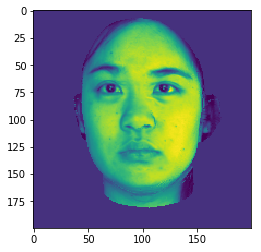

In [5]:
plt.imshow (images[0])

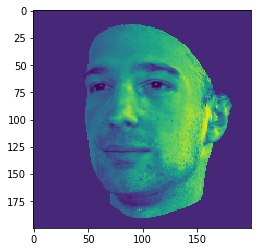

In [6]:
plt.imshow (images[1])

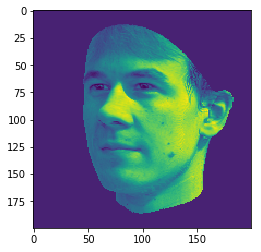

In [7]:
plt. imshow (images[2])

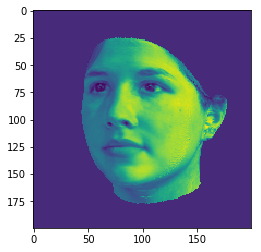

In [8]:
plt.imshow(images[3119])

In [9]:
y =np.empty([3240,1],dtype=int) 
for x in range(0, len(onlyfiles)):
    if onlyfiles[x][3]=='0': y[x]=0
    elif onlyfiles[x][3]=='1': y[x]=1
    elif onlyfiles[x][3]=='2': y[x]=2
    elif onlyfiles[x][3]=='3': y[x]=3
    elif onlyfiles[x][3]=='4': y[x]=4
    elif onlyfiles[x][3]=='5': y[x]=5
    elif onlyfiles[x][3]=='6': y[x]=6
    elif onlyfiles[x][3]=='7': y[x]=7
    elif onlyfiles[x][3]=='8': y[x]=8
    elif onlyfiles[x][3]=='9': y[x]=9

In [10]:
#funtion for cropping images to obtain only the significant part 
def crop(img):
    a=28*np.ones(len(img)) #background has pixel intensity of 28 
    b=np.where((img== a).all(axis=1)) #check image background
    img=np.delete(img,(b),0) #deleting the unwanted part from the Y axis 
    plt.imshow(img)
    img=img.transpose()
    d=28*np.ones(len(img[0]))
    e=np.where((img== d).all(axis=1))
    img=np.delete(img,e,0) #deleting the unwanted part from the X axis 
    img=img.transpose()
    print (img.shape) #printing image shape to ensure it is actually being cropped
    super_threshold_indices = img < 29 #padding zeros instead of background data  
    img[super_threshold_indices] = 0
    plt.imshow (img)
    return img[0:150, 0:128]

(176, 139)
(179, 139)
(175, 141)
(166, 132)
(173, 140)
(154, 134)
(176, 144)
(167, 128)
(175, 138)
(167, 128)
(175, 138)
(176, 144)
(175, 138)
(166, 132)
(173, 140)
(165, 140)
(175, 141)
(175, 141)
(154, 137)
(164, 129)
(175, 137)
(164, 129)
(173, 137)
(173, 137)
(176, 142)
(154, 138)
(173, 138)
(184, 140)
(167, 130)
(166, 138)
(173, 137)
(154, 138)
(176, 142)
(176, 136)
(185, 135)
(173, 138)
(176, 143)
(176, 136)
(154, 138)
(173, 138)
(184, 142)
(164, 128)
(179, 139)
(164, 129)
(176, 138)
(164, 129)
(176, 138)
(164, 129)
(179, 144)
(175, 137)
(154, 137)
(164, 129)
(180, 136)
(164, 135)
(184, 145)
(166, 135)
(167, 130)
(176, 140)
(184, 144)
(176, 140)
(172, 144)
(172, 144)
(172, 144)
(184, 144)
(166, 135)
(180, 133)
(166, 135)
(176, 140)
(176, 144)
(184, 145)
(184, 140)
(165, 140)
(179, 145)
(183, 146)
(179, 145)
(165, 140)
(173, 137)
(167, 130)
(166, 135)
(184, 139)
(184, 138)
(185, 136)
(184, 138)
(154, 136)
(176, 137)
(173, 136)
(153, 139)
(154, 136)
(176, 137)
(154, 136)
(165, 137)

(173, 137)
(164, 133)
(185, 136)
(173, 137)
(164, 136)
(166, 138)
(176, 137)
(185, 138)
(185, 138)
(180, 135)
(185, 138)
(164, 136)
(166, 138)
(164, 128)
(164, 136)
(167, 128)
(184, 139)
(176, 137)
(167, 130)
(154, 139)
(154, 139)
(185, 136)
(179, 145)
(164, 131)
(166, 134)
(166, 134)
(176, 143)
(185, 134)
(180, 136)
(184, 144)
(179, 142)
(176, 140)
(179, 144)
(164, 129)
(185, 135)
(166, 131)
(166, 138)
(166, 131)
(172, 144)
(185, 140)
(166, 131)
(176, 140)
(167, 129)
(180, 134)
(185, 134)
(166, 135)
(180, 134)
(179, 144)
(166, 134)
(180, 134)
(185, 136)
(167, 129)
(184, 145)
(180, 134)
(184, 140)
(179, 142)
(175, 140)
(185, 140)
(166, 138)
(185, 135)
(175, 140)
(185, 140)
(185, 135)
(175, 140)
(166, 131)
(185, 140)
(154, 136)
(166, 138)
(180, 134)
(154, 137)
(179, 142)
(180, 134)
(167, 129)
(185, 134)
(185, 136)
(176, 137)
(173, 136)
(173, 136)
(179, 144)
(166, 134)
(180, 134)
(166, 134)
(167, 130)
(180, 134)
(176, 143)
(164, 129)
(176, 143)
(154, 134)
(164, 131)
(165, 142)
(164, 133)

(172, 143)
(165, 137)
(176, 139)
(172, 143)
(165, 137)
(173, 136)
(164, 138)
(176, 139)
(173, 136)
(172, 143)
(165, 137)
(154, 136)
(164, 138)
(154, 136)
(179, 145)
(176, 137)
(166, 135)
(185, 136)
(173, 142)
(176, 142)
(173, 137)
(165, 142)
(154, 134)
(176, 143)
(164, 129)
(183, 146)
(164, 129)
(173, 136)
(167, 130)
(180, 134)
(175, 140)
(175, 140)
(173, 137)
(184, 138)
(173, 136)
(185, 136)
(164, 133)
(167, 130)
(184, 145)
(179, 144)
(184, 140)
(179, 144)
(164, 135)
(173, 136)
(166, 138)
(175, 137)
(184, 142)
(154, 136)
(154, 136)
(185, 133)
(173, 138)
(173, 138)
(153, 139)
(166, 131)
(176, 137)
(176, 136)
(167, 130)
(176, 135)
(153, 139)
(184, 142)
(154, 136)
(164, 129)
(184, 142)
(154, 136)
(164, 135)
(166, 138)
(164, 129)
(175, 137)
(166, 138)
(184, 140)
(184, 140)
(175, 139)
(166, 132)
(167, 128)
(176, 144)
(167, 128)
(167, 128)
(175, 139)
(184, 140)
(166, 138)
(164, 136)
(166, 138)
(166, 135)
(164, 136)
(166, 135)
(164, 129)
(154, 136)
(173, 136)
(185, 138)
(179, 145)
(176, 143)

(176, 139)
(180, 135)
(176, 139)
(176, 143)
(154, 134)
(154, 134)
(164, 133)
(165, 142)
(185, 136)
(179, 144)
(164, 131)
(166, 134)
(179, 144)
(180, 134)
(175, 140)
(166, 138)
(185, 140)
(185, 135)
(179, 142)
(167, 129)
(180, 134)
(179, 142)
(180, 134)
(179, 142)
(167, 129)
(167, 129)
(166, 138)
(185, 135)
(166, 131)
(175, 140)
(166, 138)
(185, 140)
(185, 135)
(166, 134)
(179, 144)
(180, 134)
(185, 136)
(185, 134)
(173, 136)
(185, 134)
(185, 136)
(185, 134)
(184, 144)
(154, 136)
(172, 144)
(166, 131)
(173, 136)
(172, 144)
(166, 132)
(176, 137)
(184, 145)
(166, 135)
(185, 134)
(166, 135)
(173, 136)
(185, 134)
(166, 135)
(184, 145)
(172, 144)
(184, 144)
(184, 139)
(164, 136)
(166, 135)
(184, 139)
(184, 138)
(176, 139)
(154, 136)
(176, 139)
(176, 137)
(173, 136)
(184, 140)
(165, 140)
(184, 140)
(167, 130)
(173, 137)
(173, 137)
(164, 138)
(167, 130)
(164, 131)
(164, 129)
(184, 140)
(165, 140)
(164, 131)
(164, 129)
(165, 140)
(164, 138)
(185, 138)
(176, 137)
(154, 136)
(172, 143)
(173, 136)

(166, 135)
(184, 138)
(173, 136)
(154, 136)
(173, 136)
(165, 137)
(176, 137)
(165, 140)
(184, 140)
(173, 137)
(167, 130)
(185, 136)
(173, 142)
(173, 137)
(167, 130)
(154, 139)
(185, 136)
(166, 135)
(167, 130)
(184, 145)
(184, 145)
(172, 144)
(184, 144)
(176, 140)
(184, 144)
(184, 144)
(164, 138)
(172, 144)
(166, 138)
(184, 145)
(166, 135)
(184, 144)
(164, 129)
(154, 137)
(166, 135)
(175, 137)
(175, 137)
(164, 129)
(175, 137)
(184, 140)
(176, 142)
(176, 142)
(154, 138)
(173, 137)
(173, 138)
(154, 138)
(176, 142)
(173, 137)
(173, 138)
(176, 136)
(179, 145)
(154, 137)
(164, 129)
(175, 137)
(164, 135)
(185, 136)
(154, 137)
(184, 142)
(176, 138)
(179, 139)
(164, 129)
(175, 141)
(185, 140)
(176, 144)
(176, 144)
(167, 128)
(175, 138)
(166, 132)
(173, 140)
(165, 137)
(166, 132)
(173, 140)
(166, 132)
(173, 137)
(173, 140)
(175, 138)
(176, 144)
(173, 142)
(175, 141)
(164, 135)
(175, 141)
(185, 135)
(165, 140)
(175, 141)
(167, 129)
(176, 135)
(176, 137)
(179, 139)
(175, 141)
(167, 128)
(185, 135)

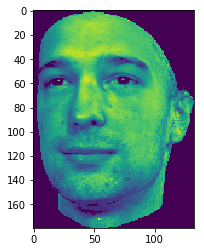

In [11]:
#cropping all the images
image = np.empty([3240,150,128],dtype=int) 
for n in range(0, len(images)):
 image[n]=crop(images[n])

In [12]:
print (image[22])

[[104   0 106 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]


In [13]:
print (image[22].shape)

(150, 128)


In [14]:
# randomly splitting data into training(80%) and test(20%) sets 
test_ind=np.random.choice(range(3240), 648, replace=False) 
train_ind=np.delete(range(0,len(onlyfiles)),test_ind)

In [15]:
# segregating the training and test images 
x_train=image[train_ind] 
y1_train=y[train_ind] 
x_test=image[test_ind] 
y1_test=y[test_ind]

In [16]:
#reshaping the input images
x_train = x_train.reshape(x_train.shape[0], 128, 150, 1) 
x_test = x_test.reshape(x_test.shape[0], 128, 150, 1)

In [17]:
#converting data to float32
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

In [18]:
#normalizing data
x_train/=255 
x_test/=255
#10 digits represent the 10 classes 
number_of_persons = 10

In [19]:
#convert data to vectors
y_train = np_utils.to_categorical(y1_train, number_of_persons) 
y_test = np_utils.to_categorical(y1_test, number_of_persons)

In [25]:
# model building
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(128,150,1))) #Input layer 
model.add(Activation('relu')) # 'relu' as activation function
model.add(Conv2D(16, (3, 3))) #first hidden layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling from (2,2)
model.add(Conv2D(16,(3, 3))) # second hidden layer 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling from (2,2)
model.add(Flatten()) #flatten the maxpooled data
# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25)) #Dropout is applied to overcome overfitting 
model.add(Dense(10)) 
#output layer
model.add(Activation('softmax')) # 'softmax' is used for SGD

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 148, 16)      160       
_________________________________________________________________
activation_5 (Activation)    (None, 126, 148, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 146, 16)      2320      
_________________________________________________________________
activation_6 (Activation)    (None, 124, 146, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 73, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 71, 16)        2320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 68160)             0         
__________

In [27]:
#model compliation
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [28]:
# data augmentation to reduce overfitting problem
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, 
                         height_shift_range=0.08,zoom_range=0.08)
test_gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=16) 
test_generator = test_gen.flow(x_test, y_test, batch_size=16)

In [29]:
#model fitting
model.fit_generator(train_generator, epochs=5, validation_data=test_generator) 
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0) 
print("Recognition Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/5
162/162 [==============================] - 296s 2s/step - loss: 1.5980 - acc: 0.4645 - val_loss: 0.2235 - val_acc: 0.9552
Epoch 2/5
162/162 [==============================] - 297s 2s/step - loss: 0.3713 - acc: 0.8661 - val_loss: 0.1324 - val_acc: 0.9475
Epoch 3/5
162/162 [==============================] - 289s 2s/step - loss: 0.1413 - acc: 0.9529 - val_loss: 0.0312 - val_acc: 0.9892
Epoch 4/5
162/162 [==============================] - 250s 2s/step - loss: 0.1083 - acc: 0.9622 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 5/5
162/162 [==============================] - 229s 1s/step - loss: 0.0455 - acc: 0.9873 - val_loss: 0.0262 - val_acc: 0.9907
Recognition Error: 0.93%
